### Muthu Palaniappan M

1. Consider given image, generate noisy images by adding Uniform, Gaussian, Salt and pepper noise to an input image. Observe the performance of smoothing filters in the spatial domain.

a. Apply suitable filtering techniques to improve the contrast of the images.

b. Generate a histogram of the image and observe how the intensity values are distributed

c. Apply histogram equalization and matching

2. Extract SIFT or SURF features from an image and visualize them.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

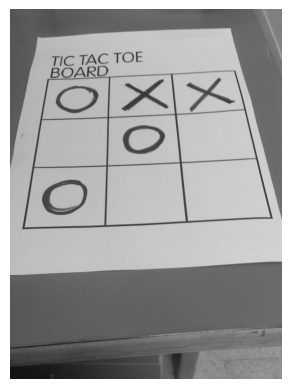

In [3]:
img = cv2.imread("Test-slanted.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.show()

In [4]:
img.shape

(3048, 2240)

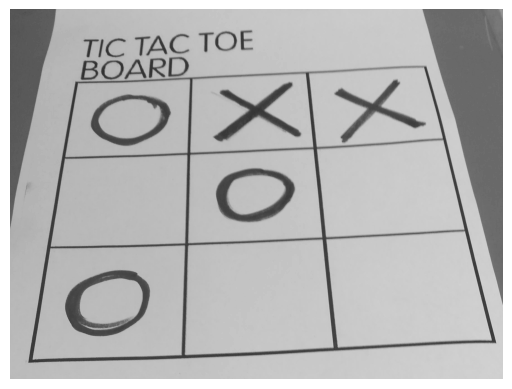

In [5]:
# (21,256) (2194,1886)
img = img[256:1886,21:2194]
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.show()

In [9]:
## Noise adding
noisy_uniform = img + np.random.uniform(low=-50, high=50, size = img.shape)
noisy_gaussian = img + np.random.normal(loc=0, scale=20, size = img.shape)
noisy_salt_pepper = img.copy()
salt_pepper = np.random.rand(*img.shape)
noisy_salt_pepper[salt_pepper < 0.5] = 0
noisy_salt_pepper[salt_pepper > 0.95] = 255

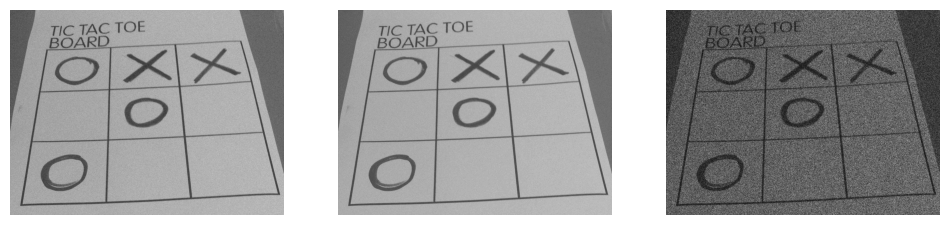

In [13]:
fig,axes = plt.subplots(1,3,figsize=(12,7))
axes[0].imshow(noisy_uniform,cmap='gray')
axes[0].axis("off")
axes[1].imshow(noisy_gaussian,cmap='gray')
axes[1].axis("off")
axes[2].imshow(noisy_salt_pepper,cmap='gray')
axes[2].axis("off")
plt.show()

In [23]:
smoothed_uniform = cv2.GaussianBlur(noisy_uniform, (5, 5), 0)
smoothed_gaussian = cv2.GaussianBlur(noisy_gaussian, (5,5),0)
smoothed_salt_pepper = cv2.medianBlur(noisy_salt_pepper, 5)

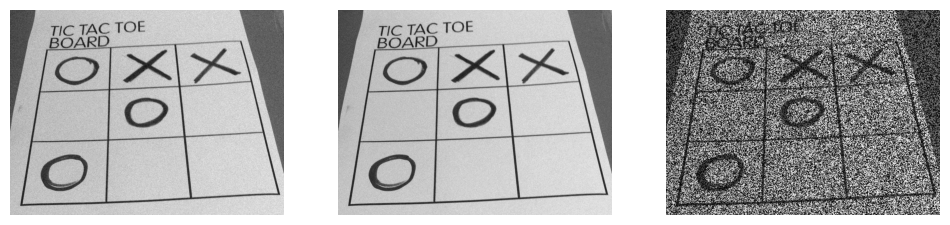

In [25]:
fig,axes = plt.subplots(1,3,figsize=(12,7))
axes[0].imshow(smoothed_uniform,cmap='gray')
axes[0].axis("off")
axes[1].imshow(smoothed_gaussian,cmap='gray')
axes[1].axis("off")
axes[2].imshow(smoothed_salt_pepper,cmap='gray')
axes[2].axis("off")
plt.show()

In [32]:
equalized_image = cv2.equalizeHist(img)
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

In [33]:
hist_input = cv2.calcHist([img], [0], None, [256], [0, 256])

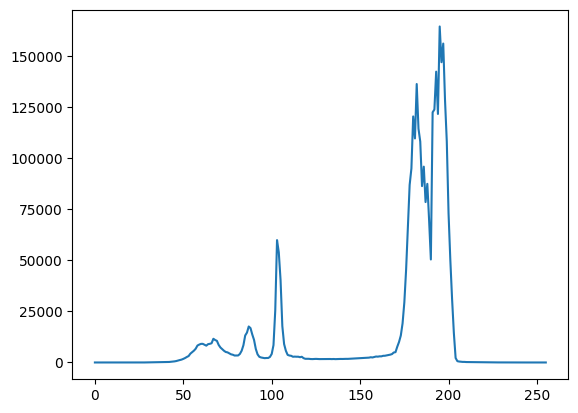

In [34]:
plt.plot(hist_input)

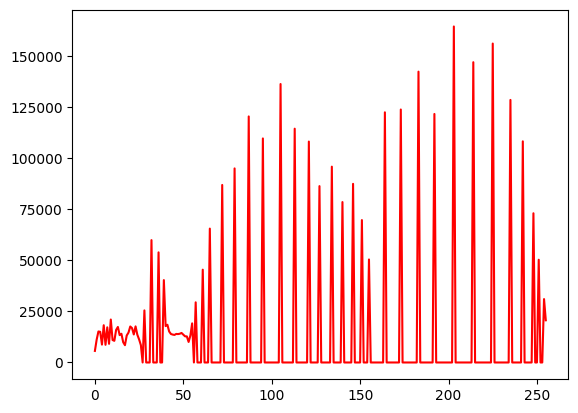

In [35]:
plt.plot(hist_equalized, color='red')